# 1 一変量データの記述

## 1.4 一変量データの扱い方

In [3]:
# CSVファイルの読み込み
data <- read.csv("csv/Math&Phys.csv")

# 1列目のデータを変数mathに代入
math <- data[,1]

print(math)

  [1]  90  65  60  75  50  60  25  35  85 100  45  95  80  80  95  55  55  65
 [19]  50  65  40  85  70  65  65  15  65  75  60  75  25  65  55  40  70  60
 [37]  60  35  75  45  60  55  75  75  90  35  20  90 100  65  15  80  80  85
 [55]  25  10  95  45  55  80  80  40  90  95  90  70  80  25  65  30  60  25
 [73]  35  20  70 100  50  60  50  90  65  45  35  50  85  30  50  70  85  85
 [91]  75  80  40  60  70  80  95  50  40  25  60  35  30  45  35  70  75  55
[109]  40 100  50  55  90  95  60  70  80  70  45  55  75  45  65  30  25  85
[127]  90  90  60  85  20  75  70  75  50  90  60  15  90  75  70  35  95  60
[145]  45  55


In [4]:
length(math)
math[10]

[1] 146

[1] 100

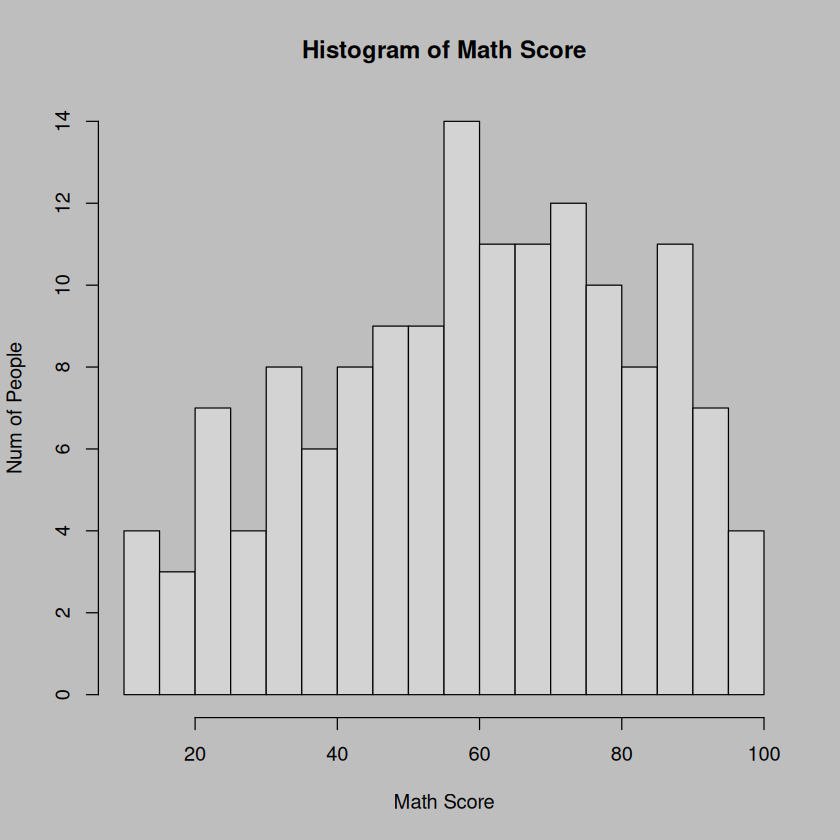

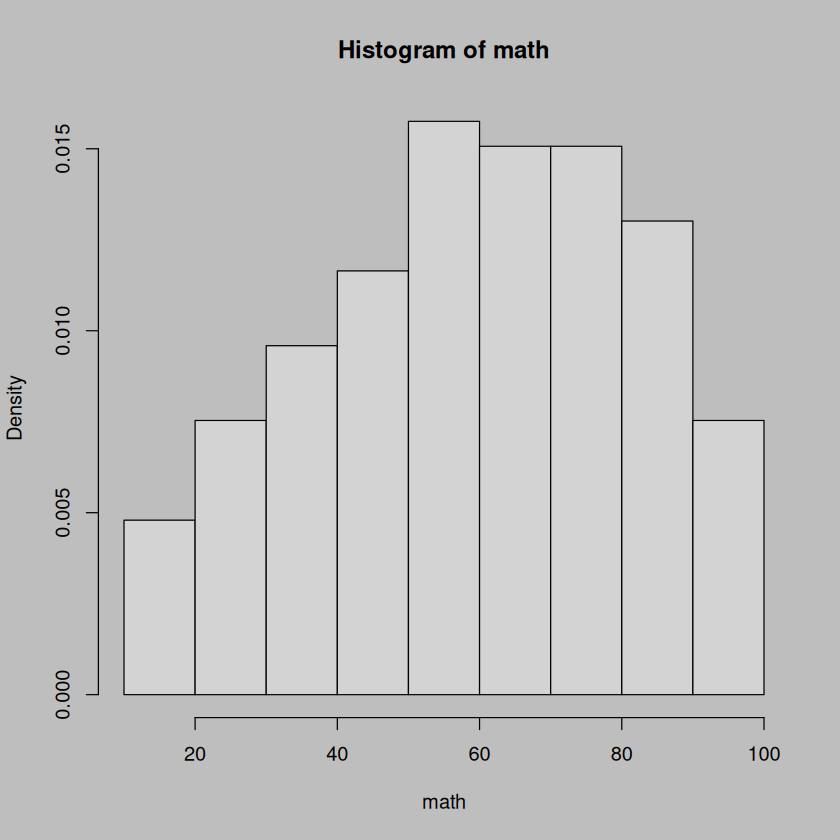

In [ ]:
# ビン幅（階級の幅）を指定
bin_width <- 5
breaks <- seq(min(math), max(math), by = bin_width)

# グラフの背景色を指定
par(bg = "gray")
hist(math, breaks = breaks, xlab = "Math Score", ylab = "Num of People", main = "Histogram of Math Score") # 度数
hist(math, prob=TRUE) # 相対度数

- （標本）平均 (sample mean)
$$
\bar{x} = \frac{1}{n} \sum_{j=1}^{n} x_j
$$
- 分散 (variance)
$$
\sigma^2 = \frac{1}{n} \sum_{j=1}^{n} (x_j - \bar{x})^2
$$
- 標準偏差 (standard deviation)
$$
\sigma = \sqrt{\frac{1}{n} \sum_{j=1}^{n} (x_j - \bar{x})^2}
$$
- 統計では通常、**不偏分散** (unbiased variance) を用いる（理論はch11）
$$
\tilde{\sigma}^2 = \frac{1}{n-1} \sum_{j=1}^{n} (x_j - \bar{x})^2
$$
- Rでは不偏分散の平方根を**標準偏差**として出力
$$
\tilde{\sigma} = \sqrt{\frac{1}{n-1} \sum_{j=1}^{n} (x_j - \bar{x})^2}
$$

In [ ]:
cat(sprintf('平均：%.3f\n', mean(math)))
cat(sprintf('（不偏）分散：%.3f\n', v<-var(math)))
cat(sprintf('標準偏差：%.3f(, %.3f)\n', sd(math), sqrt(v)))

平均：61.610
（不偏）分散：506.529
標準偏差：22.506(, 22.506)


- 不偏分散から（不偏分散の平方根ではない通常の）**標準偏差**を求める
$$
\sigma = \sqrt{\frac{n-1}{n} \tilde{\sigma}^2}
$$

In [7]:
cat(sprintf('（通常の）標準偏差：%.3f', sqrt(v*(length(math)-1)/length(math))))

（通常の）標準偏差：22.429

- 算術・幾何・調和 平均の判別
  1. まず「値を足せる？」  
     → 足せる → 算術平均
  2. 足せないが「倍率で効いてる？」  
     →  掛け算的に効く → 幾何平均
  3. 足せないし倍率でもない → 逆数が自然に出てくる？  
     → 速度・効率・レート系なら調和平均

- 幾何平均 (geometric mean)
$$
x_G = \left(\prod_{i=1}^{n} x_i\right)^{\frac{1}{n}} = \sqrt[n]{x_1 x_2 \cdots x_n}
$$

In [9]:
x <- c(1.2,1.1,1.05)
cat(sprintf('幾何平均：%.3f', prod(x)^(1/length(x))))

幾何平均：1.115

- 調和平均 (harmonic mean)
$$
\frac{1}{x_H} = \frac{1}{n} \sum_{j=1}^{n} \frac{1}{x_j}
$$

In [11]:
v <- c(60, 20)
print(1/v)
cat(sprintf('調和平均：%.1f', 1/mean(1/v)))

[1] 0.01666667 0.05000000
調和平均：30.0

## 1.5 階級数の決め方